# ***Detección de URLs de Phishing mediante un Enfoque Híbrido con Machine Learning***

El presente trabajo se realiza con el objetivo de desarrollar un modelo híbrido para la detección de URLs de phishing, utilizando un enfoque basado en técnicas de aprendizaje automático. Para ello, se propone un modelo de ***stacking*** que combina múltiples algoritmos de clasificación, optimizando su desempeño a través de un metamodelo basado en ***Regresión Logística***.

El objetivo principal es evaluar el desempeño de diferentes modelos individuales y comparar su efectividad frente a la estrategia híbrida. Dentro de los modelos de ***benchmark*** utilizados en el estudio se encuentran:

- ***K-Nearest Neighbors (KNN)***
- ***Regresión Ridge y Lasso***
- ***Clasificador Bayesiano***
- ***Árboles de Decisión (DT)***
- ***Random Forest (RF)***
- ***XGBoost***
- ***Máquinas de Soporte Vectorial (SVM)***
- ***Perceptrón Multicapa (MLP)***

El análisis se realizará sobre el conjunto de datos ***[PhiUSIIL Phishing URL](https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset)***, que contiene características relevantes extraídas de URLs legítimas y de phishing. A través de este estudio, se espera demostrar que la combinación de múltiples modelos a través de ***stacking*** puede mejorar la capacidad predictiva y generalización en la detección de sitios maliciosos.

El resto del trabajo se encuentra organizado de la siguiente manera:

- ***Información del Conjunto de Datos***
- ***Análisis Exploratorio de Datos***
- ***Fundamentación Matemática de los Modelos***
- ***Implementación de los Modelos***
- ***Benchmark***
- ***Conclusiones***
- ***Referencias***


## ***Información del Conjunto de datos***

Primero, cargaremos el dataset desde el repositorio de ***[UCI](https://archive.ics.uci.edu/)*** mediante la siguiente línea de código.

In [101]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 

Con esto, obtenemos un objeto de tipo `ucimlrepo.dotdict.dotdict`, el cual asignaremos a nuestros conjuntos `X` e `y` de la siguiente manera:

In [102]:
# data (as pandas dataframes) 
X = phiusiil_phishing_url_website.data.features 
y = phiusiil_phishing_url_website.data.targets 

Podemos acceder a los metadatos del dataset, donde encontraremos información útil como el **ID del dataset (967)**, el resumen (*abstract*), las tareas de investigación (*tasks*), y otros detalles importantes. Este dataset, denominado ***PhiUSIIL Phishing URL (Website)***, contiene un total de **235,795 instancias** y **54 características**, combinando datos **reales, categóricos e enteros**. Su propósito principal es la **clasificación de URLs en legítimas o phishing**, con características extraídas tanto del código fuente de las páginas web como de la estructura de la URL. Fue creado en **2024** y se encuentra disponible en el repositorio de ***[UCI](https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset)***.

### ***Metadatos***

In [103]:
# metadata
display(phiusiil_phishing_url_website.metadata) 

{'uci_id': 967,
 'name': 'PhiUSIIL Phishing URL (Website)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset',
 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv',
 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.',
 'area': 'Computer Science',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 235795,
 'num_features': 54,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['label'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2024,
 'last_updat

### ***Variables***

#### **Información de la URL y el Dominio**  
- **`URL`**: Dirección completa de la página web analizada.  
- **`URLLength`**: Longitud total de la URL en número de caracteres.  
- **`Domain`**: Dominio principal extraído de la URL.  
- **`DomainLength`**: Longitud del dominio en caracteres.  
- **`IsDomainIP`**: Indica si el dominio es una dirección IP en lugar de un nombre de dominio ($1$ si es una IP, $0$ si no).  
- **`TLD`**: Extensión del dominio de nivel superior (ejemplo: `.com`, `.org`).  
- **`TLDLength`**: Longitud del TLD en caracteres.  
- **`NoOfSubDomain`**: Número de subdominios presentes en la URL.  

#### **Características basadas en similitud y probabilidad**  
- **`URLSimilarityIndex`**: Índice de similitud de la URL con otras URLs legitimas conocidas.  
- **`TLDLegitimateProb`**: Probabilidad de que el TLD pertenezca a un sitio legítimo.  
- **`URLCharProb`**: Probabilidad de que la composición de caracteres en la URL corresponda a una página legítima.  
- **`DomainTitleMatchScore`**: Puntaje que mide la similitud entre el dominio y el título de la página.  
- **`URLTitleMatchScore`**: Puntaje que mide la similitud entre la URL y el título de la página.  

#### **Análisis de caracteres en la URL**  
- **`CharContinuationRate`**: Tasa de continuidad de caracteres en la URL, mide patrones de escritura sospechosos.  
- **`NoOfLettersInURL`**: Cantidad total de letras en la URL.  
- **`LetterRatioInURL`**: Proporción de letras respecto al total de caracteres en la URL.  
- **`NoOfDegitsInURL`**: Número total de dígitos en la URL.  
- **`DegitRatioInURL`**: Proporción de dígitos respecto al total de caracteres en la URL.  
- **`NoOfEqualsInURL`**: Número de signos `=` en la URL.  
- **`NoOfQMarkInURL`**: Número de signos de interrogación `?` en la URL.  
- **`NoOfAmpersandInURL`**: Número de símbolos `&` en la URL.  
- **`NoOfOtherSpecialCharsInURL`**: Número total de otros caracteres especiales en la URL.  
- **`SpacialCharRatioInURL`**: Proporción de caracteres especiales en la URL.  

#### **Presencia de técnicas de ofuscación**  
- **`HasObfuscation`**: Indica si la URL tiene técnicas de ofuscación ($1$ si tiene, $0$ si no).  
- **`NoOfObfuscatedChar`**: Número de caracteres que forman parte de una técnica de ofuscación.  
- **`ObfuscationRatio`**: Proporción de caracteres de ofuscación respecto al total de caracteres de la URL.  

#### **Protocolo y seguridad**  
- **`IsHTTPS`**: Indica si la URL usa el protocolo seguro HTTPS ($1$ si sí, $0$ si usa HTTP).  
- **`Robots`**: Indica si la página tiene un archivo `robots.txt` ($1$ si sí, $0$ si no).  
- **`IsResponsive`**: Indica si el sitio web responde correctamente a las solicitudes del usuario ($1$ si sí, $0$ si no).  

#### **Estructura del código fuente**  
- **`LineOfCode`**: Número total de líneas en el código fuente de la página.  
- **`LargestLineLength`**: Longitud de la línea más larga en el código fuente.  
- **`HasTitle`**: Indica si la página tiene una etiqueta `<title>` definida ($1$ si sí, $0$ si no).  
- **`Title`**: Texto contenido en la etiqueta `<title>`.  

#### **Redirecciones y formularios**  
- **`NoOfURLRedirect`**: Número total de redirecciones de la URL a otras páginas.  
- **`NoOfSelfRedirect`**: Número de redirecciones dentro del mismo dominio.  
- **`HasExternalFormSubmit`**: Indica si hay formularios en la página que envían datos a un dominio externo ($1$ si sí, $0$ si no).  
- **`HasSubmitButton`**: Indica si la página tiene botones de envío de formularios.  
- **`HasHiddenFields`**: Indica si la página tiene campos de formulario ocultos.  
- **`HasPasswordField`**: Indica si la página tiene un campo de contraseña.  

#### **Elementos gráficos y multimedia**  
- **`NoOfPopup`**: Número de ventanas emergentes (pop-ups) detectadas.  
- **`NoOfiFrame`**: Número de `iframe` incrustados en la página.  
- **`HasFavicon`**: Indica si la página tiene un favicon ($1$ si sí, $0$ si no).  
- **`NoOfImage`**: Número total de imágenes en la página.  
- **`NoOfCSS`**: Número total de archivos CSS en la página.  
- **`NoOfJS`**: Número total de archivos JavaScript en la página.  

#### **Referencias y enlaces**  
- **`NoOfSelfRef`**: Número de enlaces dentro del mismo dominio.  
- **`NoOfEmptyRef`**: Número de enlaces vacíos (`href="#"`).  
- **`NoOfExternalRef`**: Número de enlaces externos a otros dominios.  

#### **Presencia de elementos financieros y sociales**  
- **`Bank`**: Indica si la página contiene palabras clave relacionadas con bancos.  
- **`Pay`**: Indica si la página contiene términos relacionados con pagos.  
- **`Crypto`**: Indica si la página menciona términos relacionados con criptomonedas.  
- **`HasSocialNet`**: Indica si la página contiene enlaces a redes sociales.  

#### **Información de derechos y seguridad**  
- **`HasCopyrightInfo`**: Indica si la página menciona información de derechos de autor.  

#### **Variable objetivo**  
- **`label`**: Variable de clasificación binaria que indica si la URL es phishing ($0$) o legítima ($1$).  


## ***Análisis Exploratorio de Datos***

En esta sección, se presenta un ***Análisis Exploratorio de Datos (EDA)*** sobre el dataset empleado, con el objetivo de identificar el comportamiento de las variables, detectar valores faltantes, así como analizar patrones relevantes antes de proceder con la construcción de los modelos de clasificación.

### ***Estadísticas Descriptivas***

In [104]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Enable better formatting in Jupyter Notebook
pd.set_option('display.width', 1000)  # Adjust output width
pd.set_option('display.colheader_justify', 'center')  # Align column headers

# Improve DataFrame styling (works in Jupyter)
def style_dataframe(df):
    return df.style.set_properties(**{
        'background-color': '#f4f4f4',
        'border-color': 'black',
        'color': 'black',
        'font-size': '12px',
    }).set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', '#40466e'), ('color', 'white')]
    }])

In [105]:
# libraries
import numpy as np
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib
import scipy.stats as stats

Podemos obtener una previsualización del dataset utilizando la método ***`.head()`***, que muestra las primeras filas del conjunto de datos. Esto permite inspeccionar su estructura, tipos de datos y valores iniciales antes de profundizar en el análisis exploratorio.

In [106]:
df = pd.concat([X, y], axis=1)
df.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.00,1.00,0.52,0.06,3,1,0,0,0.00,18,0.58,0,0.00,0,0,0,1,0.03,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0.00,0.00,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.00,0.67,0.03,0.05,2,1,0,0,0.00,9,0.39,0,0.00,0,0,0,2,0.09,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.56,55.56,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.00,0.87,0.03,0.06,2,2,0,0,0.00,15,0.52,0,0.00,0,0,0,2,0.07,1,467,682,1,voice fm southampton,46.67,46.67,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.00,1.00,0.52,0.06,3,1,0,0,0.00,13,0.50,0,0.00,0,0,0,1,0.04,1,6356,26824,1,home page: seminars in fetal and neonatal medi...,0.00,0.00,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.00,1.00,0.08,0.06,3,1,0,0,0.00,20,0.61,0,0.00,0,0,0,1,0.03,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.00,100.00,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1


Se observa una mezcla de datos tanto **numéricos** como **categóricos**, lo que sugiere la necesidad de un tratamiento adecuado para cada tipo de variable. Además, se evidencia que el problema es de **clasificación binaria**, donde el valor $0$ representa una URL clasificada como **phishing**, mientras que el valor $1$ indica una **URL legítima**.

In [107]:
df.shape

(235795, 55)

Se evidencia un dataset con $235,795$ registros, 54 variables predictoras y una variable objetivo.

In [108]:
X.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00,235795.00
mean,34.57,21.47,0.00,78.43,0.85,0.26,0.06,2.76,1.16,0.00,0.02,0.00,19.43,0.52,1.88,0.03,0.06,0.03,0.03,2.34,0.06,0.78,1141.90,12789.53,0.86,50.13,52.12,0.36,0.27,0.62,0.13,0.04,0.44,0.22,1.59,0.04,0.46,0.41,0.38,0.10,0.13,0.24,0.02,0.49,26.08,6.33,10.52,65.07,2.38,49.26
std,41.31,9.15,0.05,28.98,0.22,0.25,0.01,0.60,0.60,0.05,1.88,0.00,29.09,0.12,11.89,0.07,0.93,0.19,0.84,3.53,0.03,0.41,3419.95,152201.10,0.35,49.68,49.60,0.48,0.44,0.48,0.34,0.20,0.50,3.87,5.76,0.21,0.50,0.49,0.48,0.30,0.33,0.43,0.15,0.50,79.41,74.87,22.31,176.69,17.64,161.03
min,13.00,4.00,0.00,0.16,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,16.00,0.00,57.02,0.68,0.01,0.05,2.00,1.00,0.00,0.00,0.00,10.00,0.43,0.00,0.00,0.00,0.00,0.00,1.00,0.04,1.00,18.00,200.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,27.00,20.00,0.00,100.00,1.00,0.08,0.06,3.00,1.00,0.00,0.00,0.00,14.00,0.52,0.00,0.00,0.00,0.00,0.00,1.00,0.05,1.00,429.00,1090.00,1.00,75.00,100.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,2.00,6.00,12.00,0.00,10.00
75%,34.00,24.00,0.00,100.00,1.00,0.52,0.06,3.00,1.00,0.00,0.00,0.00,20.00,0.59,0.00,0.00,0.00,0.00,0.00,3.00,0.08,1.00,1277.00,8047.00,1.00,100.00,100.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,29.00,8.00,15.00,88.00,1.00,57.00
max,6097.00,110.00,1.00,100.00,1.00,0.52,0.09,13.00,10.00,1.00,447.00,0.35,5191.00,0.93,2011.00,0.68,176.00,4.00,149.00,499.00,0.40,1.00,442666.00,13975732.00,1.00,100.00,100.00,1.00,1.00,1.00,1.00,1.00,1.00,602.00,1602.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8956.00,35820.00,6957.00,27397.00,4887.00,27516.00


* ***Análisis de la longitud de la URL y dominio***  
La longitud promedio de las URLs en el conjunto de datos es de **$34.57$** caracteres, con una desviación estándar de **$41.31$**, lo que indica una gran variabilidad en las longitudes. El dominio, en promedio, tiene **$21.47$** caracteres, con una desviación estándar de **$9.15$**, lo que sugiere que la longitud del dominio es más estable en comparación con la URL completa. Algunas URLs pueden ser extremadamente largas, lo que podría ser indicativo de técnicas de ofuscación utilizadas en ataques de phishing.  

* ***Análisis de la ofuscación en URLs***  
La variable `HasObfuscation` tiene una media cercana a **$0$**, lo que sugiere que la mayoría de las URLs no presentan técnicas de ofuscación. Sin embargo, la variable `NoOfObfuscatedChar` tiene un valor máximo alto, lo que indica que existen algunas URLs altamente ofuscadas. La `ObfuscationRatio` es en su mayoría **baja**, lo que implica que la mayoría de las URLs en la muestra no dependen de técnicas de ofuscación para engañar a los usuarios.  

* ***Composición de caracteres en las URLs***  
Las URLs contienen en promedio **$19.43$** letras y **$1.88$** dígitos, con una relación de letras del **$52\%$** y una relación de dígitos baja (**$3\%$**). Esto sugiere que la mayoría de las URLs en la muestra están compuestas predominantemente por letras, con pocos números. Sin embargo, el número de caracteres especiales es significativo (**$2.34$** en promedio), lo que podría indicar la presencia de símbolos usados en ataques de phishing, como `@`, `=`, o `?`, los cuales pueden ser señales de manipulación de enlaces.  

* ***Seguridad de las URLs (HTTPS y redirecciones)***  
En promedio el **$78\%$** de las URLs utilizan HTTPS, lo cual es positivo en términos de seguridad, ya que significa que la mayoría de los sitios en el conjunto de datos utilizan un protocolo seguro. Sin embargo, el número promedio de redirecciones (`NoOfURLRedirect`) es **$0.13$**, con casos extremos que podrían implicar técnicas de redireccionamiento malicioso.  

* ***Características del contenido de las páginas***  
El número promedio de líneas de código (`LineOfCode`) es **$1141.90$**, con una gran desviación estándar (**$3419.95$**), lo que indica que algunas páginas tienen un código extremadamente grande, posiblemente para ocultar contenido malicioso. Además, el `LargestLineLength` tiene un valor máximo muy alto (**$13.975.732.10$**), lo que sugiere la presencia de técnicas de codificación en una sola línea, usadas frecuentemente en ataques de phishing.  

* ***Coincidencia con títulos y dominios***  
Las métricas `DomainTitleMatchScore` y `URLTitleMatchScore` tienen valores promedio de **$50.13$** y **$52.12$**, respectivamente, con una alta desviación estándar. Esto sugiere que en muchos casos la URL o el dominio no coinciden con el título de la página, lo que podría indicar sitios web falsificados o phishing.  

* ***Presencia de elementos web sospechosos***  
    - **`NoOfPopup`** (cantidad de pop-ups) tiene un valor medio de **$0.22$**, lo que indica que la mayoría de las páginas no abusan de los pop-ups, pero algunos casos extremos pueden hacerlo.  
    - **`HasExternalFormSubmit`** tiene un valor medio de **$0.04$**, lo que indica que pocas páginas envían formularios a dominios externos, aunque en algunos casos esto podría ser un indicativo de phishing.  
    - **`HasHiddenFields`** tiene un valor medio de **$0.38$ lo que indica que hay páginas con formularios ocultos, los cuales podrían ser señales de intentos de robo de credenciales.  

* ***Presencia de términos financieros en URLs***  
Las variables `Bank`, `Pay` y `Crypto` tienen valores medios bajos (**$0.13, 0.24 y 0.02$** respectivamente), lo que indica que solo una fracción de las URLs en la muestra tienen términos relacionados con bancos, pagos o criptomonedas. Esto sugiere que el conjunto de datos incluiye una mezcla de sitios legítimos y sitios de phishing.  

* ***Enlaces y referencias en la página***  
Las páginas tienen en promedio **$10.52$** archivos JavaScript (`NoOfJS`), **$6.33$** archivos CSS (`NoOfCSS`), y **$26.08$** imágenes (`NoOfImage`). Un alto número de archivos JS y referencias externas (`NoOfExternalRef`, con una media de **$49.26$**) puede ser una señal de técnicas de phishing avanzadas, como la carga de scripts maliciosos desde servidores externos.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

El método `.info()` nos permite obtener un resumen del dataset, incluyendo el número de filas, columnas, tipos de datos y valores no nulos. En este caso, se evidencia que el conjunto de datos tiene un total de **55 columnas**, distribuidas de la siguiente manera:  

- **10 columnas de tipo `float`**: Estas variables suelen representar valores numéricos continuos, como medidas, porcentajes o probabilidades.  
- **41 columnas de tipo `int`**: Generalmente representan variables discretas, como conteos, identificadores o categorías codificadas numéricamente.  
- **4 columnas de tipo `object`**: Estas corresponden a variables categóricas o de texto, que pueden incluir nombres, códigos o descripciones.  

La estructura del dataset sugiere que la mayoría de las variables son numéricas, lo que podría ser útil para técnicas de modelado estadístico y machine learning. Además, es importante verificar si hay valores nulos para determinar la necesidad de imputación o limpieza de datos.

In [110]:
df.isnull().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

La revisión de valores nulos confirma que **no hay datos faltantes en el dataset**, lo que evita la necesidad de imputación y permite un uso directo en modelos de machine learning.

### ***Identificación de Valores Atípicos***

<p style="text-align:center; font-weight:bold;">Cálculo del IQR</p> 

$$
IQR = Q_3 - Q_1
$$

<p style="text-align:center; font-weight:bold;">Límites para detección de atípicos</p>  

$$
\text{Límite Inferior} = Q1 - 1.5 \times IQR
$$  
$$
\text{Límite Superior} = Q3 + 1.5 \times IQR
$$  

Un dato se considera atípico si:  

$$
\text{Dato} < \text{Límite Inferior} \quad \text{o} \quad \text{Dato} > \text{Límite Superior}
$$  

Otra técnica ampliamente utilizada es el ***Z-score***, el cual mide cuántas desviaciones estándar se encuentra un valor con respecto a la media. La formula que sigue es:  

<p style="text-align:center; font-weight:bold;">Cálculo del Z-score</p>  

$$
Z = \frac{x - \mu}{\sigma}
$$ 

Donde:  
- $x$ es el valor de la observación  
- $\mu$ es la media de la variable  
- $\sigma$ es la desviación estándar  

Un valor se considera atípico si su ***Z-score*** es mayor a un umbral predefinido, generalmente:  

$$
|Z| > 3
$$  


In [111]:
df_numeric = df.select_dtypes(exclude='object')

z_scores = stats.zscore(df_numeric)
outliers_z = (abs(z_scores) > 3).sum(axis=0)  # Count of outliers per column

q1 = df_numeric.quantile(0.25)
q3 = df_numeric.quantile(0.75)
iqr = q3 - q1
outliers_iqr = ((df_numeric < (q1 - 1.5 * iqr)) | (df_numeric > (q3 + 1.5 * iqr))).sum(axis=0)

total_values = df_numeric.shape[0] 
proportion_z = outliers_z / total_values
proportion_iqr = outliers_iqr / total_values

outlier_proportions = pd.DataFrame({
    'Z-score Proportion': proportion_z,
    'IQR Proportion': proportion_iqr
})

display(outlier_proportions)

,Z-score Proportion,IQR Proportion
URLLength,0.01,0.10
DomainLength,0.02,0.06
IsDomainIP,0.00,0.00
URLSimilarityIndex,0.00,0.00
CharContinuationRate,0.00,0.00
TLDLegitimateProb,0.00,0.00
URLCharProb,0.01,0.04
TLDLength,0.01,0.01
NoOfSubDomain,0.03,0.24
HasObfuscation,0.00,0.00


El análisis de valores atípicos en el dataset muestra que algunas variables, como `NoOfSubDomain` ($24\%$ por IQR) y `IsHTTPS` ($22\%$ por IQR), presentan una proporción considerable de datos extremos.  

Es importante destacar que el ***método del IQR es más restrictivo*** en la detección de valores atípicos, ya que se basa en los cuartiles y no asume una distribución específica de los datos. Esto puede llevar a que se consideren atípicos valores que en realidad son parte de la variabilidad natural de la variable.  

En el contexto de aprendizaje automático, eliminar estos valores podría afectar negativamente la capacidad del modelo para detectar patrones relevantes, especialmente en problemas como la detección de phishing, donde ciertos valores extremos pueden ser indicadores clave de comportamiento malicioso.  

En lugar de eliminar los valores atípicos, es recomendable normalizarlos o transformarlos solo si el modelo lo requiere. Esto permite que el modelo capture la información contenida en estos valores sin distorsionar su estructura subyacente.


```{admonition} Resumen
* Problema de clasificación binaria
* Dataset con $54$ variables predictoras
* No hay valores nulos
* Hay Mezcla de tipos de variables
* Existen valores atípicos en variables numéricas

## ***Análisis Gráfico***

### ***Variable Objetivo***

In [112]:
display(y.value_counts())
display(y.value_counts(normalize=True))

label
1        134850
0        100945
Name: count, dtype: int64

label
1       0.57
0       0.43
Name: proportion, dtype: float64

La distribución de la variable objetivo `label` muestra un ligero desbalance, donde el ***57% de las muestras*** corresponden a la clase `1` (posiblemente legítima) y el ***43%*** a la clase `0` (posiblemente phishing).  

Este desbalance ***no es extremo***, por lo que la mayoría de los modelos de aprendizaje automático deberían manejarlo sin necesidad de técnicas avanzadas de balanceo. Sin embargo, en modelos sensibles a la distribución de clases, como ***regresión logística o SVM***, puede ser recomendable aplicar técnicas como ***Balanceo de clases***, ***undersampling***, o ***oversampling (SMOTE, ADASYN)*** para evitar sesgos en la predicción.  

Además, al evaluar el desempeño del modelo, métricas como ***AUC-ROC, F1-score o balanced accuracy*** pueden proporcionar una mejor visión de la efectividad del modelo en ambas clases, en lugar de depender únicamente de la precisión general.

In [113]:
target_counts = y.value_counts()
target_labels = ["Legitimate (1)", "Phishing (0)"]

fig_bar = px.bar(
    x=target_labels,
    y=target_counts,
    text=target_counts,
    color=target_labels,
    color_discrete_sequence=["#FF5733", "#33FF57"],
    title="Target Variable Distribution"
)
fig_bar.update_traces(texttemplate='%{text}', textposition='outside')
fig_bar.update_layout(xaxis_title="Class", yaxis_title="Count", showlegend=False)

fig_bar.show()


Gráficamente, también podemos observar este ligero desbalance a favor de las URLs legítimas.

Finalmente, para validar si realmente las diferencias en el número de observaciones son estadísticamente significativas, podemos realizar una prueba de chi-cuadrado bajo la siguientes hipótesis:  

$$
H_0: p_1 = p_2 \\
H_1: p_1 \neq p_2
$$

**Estadístico Chi-cuadrado:**

$$
\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}
$$

Donde:  
- $O_i$ = frecuencia observada  
- $E_i$ = frecuencia esperada  
- $k$ = número de categorías

Si tras aplicar la prueba de chi-cuadrado obtenemos un $\text{p-valor < 0.05}$, rechazamos la hipótesis nula, concluyendo que la diferencia en el número de observaciones entre las clases es estadísticamente significativa y, por tanto, se justifica aplicar técnicas de balanceo.  

Si el $\text{p-valor ≥ 0.05}$, no se rechaza la hipótesis nula, lo que indica que las diferencias observadas podrían ser atribuibles al azar y no sería necesario forzar un balanceo, aunque se debe evaluar su impacto en el rendimiento predictivo.

In [114]:
observed = y.value_counts()

# We assume a 50% distribution for both classes if there's no bias
expected = [len(y) / 2, len(y) / 2]  

chi2_stat, p_val = stats.chisquare(observed, expected)

display(f"Chi2 Statistic: {chi2_stat}")
display(f"P-value: {p_val}")

if p_val < 0.05:
    display("Reject the null hypothesis: The proportions are significantly different.")
else:
    display("Fail to reject the null hypothesis: The proportions are not significantly different.")



'Chi2 Statistic: 4875.20526304629'

'P-value: 0.0'

'Reject the null hypothesis: The proportions are significantly different.'

Dado que el $\text{p-valor}$ es menor que $\alpha = 0.05$, podemos rechazar la hipótesis nula a favor de la significancia. Por tanto, será necesario aplicar alguna técnica de balanceo para impedir un favorecimiento injusto de la clase mayoritaria y evitar sesgos en el aprendizaje del modelo.

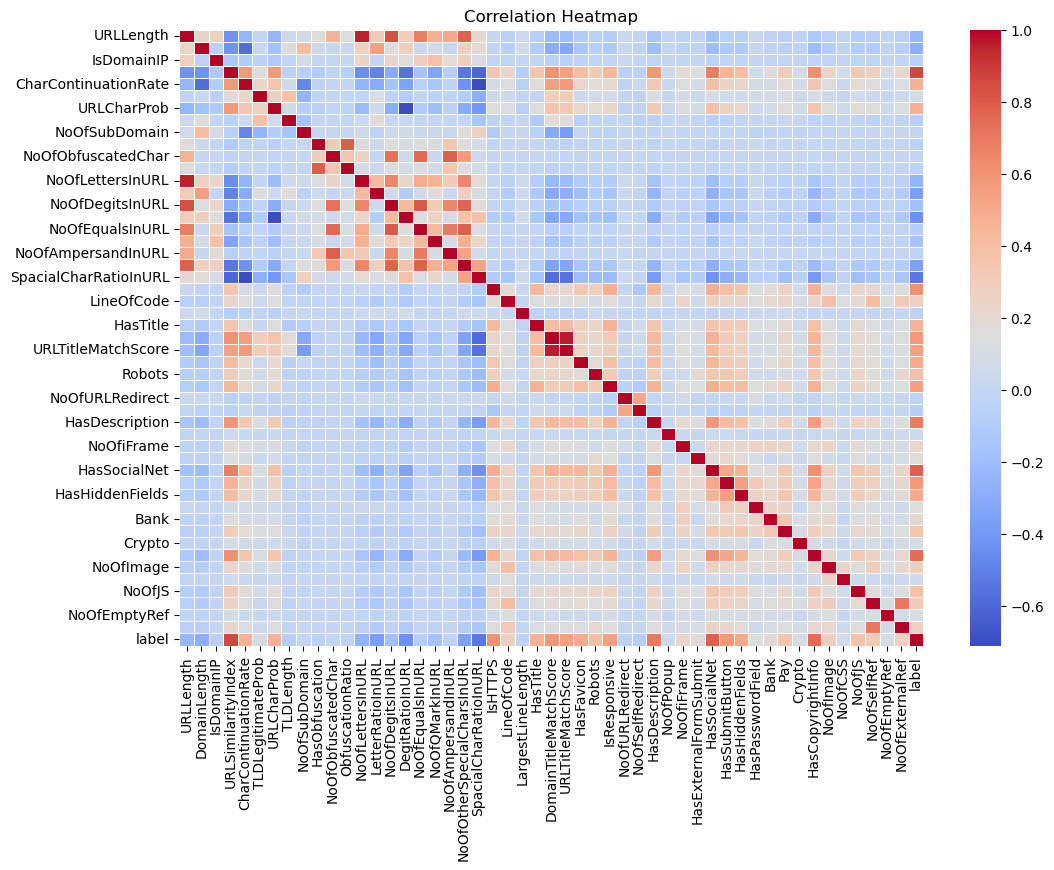

'Top 10 Correlation With Label'

URLSimilarityIndex      0.86
HasSocialNet            0.78
HasCopyrightInfo        0.74
HasDescription          0.69
IsHTTPS                 0.61
DomainTitleMatchScore   0.58
HasSubmitButton         0.58
IsResponsive            0.55
URLTitleMatchScore      0.54
HasHiddenFields         0.51
Name: label, dtype: float64

In [115]:
correlation_matrix = df.select_dtypes(exclude=object).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

display("Top 10 Correlation With Label")
display(correlation_matrix["label"].sort_values(ascending=False)[1:11])

El análisis de correlación muestra que varias variables tienen una relación fuerte con la variable objetivo `label`. En particular, **`URLSimilarityIndex` (0.86)**, **`HasSocialNet` (0.78)** y **`HasCopyrightInfo` (0.74)** presentan correlaciones altas, lo que sugiere que estas características tienen un impacto significativo en la clasificación de URLs como phishing o legítimas.  

Otras variables como **`HasDescription` (0.69)**, **`IsHTTPS` (0.61)** y **`DomainTitleMatchScore` (0.58)** también muestran correlaciones moderadas, indicando que pueden aportar información relevante en la detección de phishing.  

Si bien la correlación lineal es útil para identificar relaciones directas, en modelos de aprendizaje automático es importante considerar interacciones no lineales y efectos combinados entre múltiples características. Por lo tanto, se recomienda complementar este análisis con técnicas como **SHAP values**, **feature importance en modelos basados en árboles**, o análisis de contribución de variables en modelos más avanzados para obtener una comprensión más completa del impacto de cada variable en la clasificación.

```{admonition} Resumen
* La variable objetivo presenta correlaciones altas (mayor a 0.5) con al menos 5 variables
* Según la prueba `chi-square` la diferencia en las clases amerita aplicar técnicas de balanceo

### ***Análisis bivariado***

In [116]:
def plot_continuous_features(df, features):
    for feature in features:
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.violinplot(x=df["label"].astype(str), y=df[feature], hue=df["label"].astype(str), palette=["blue", "red"], legend=False, ax=ax)
        ax.set_title(f"Distribution of {feature} for Label")
        ax.set_xlabel("Label")
        ax.set_ylabel(feature)
        yield fig

def plot_binary_features(df, features):
    for feature in features:
        df_grouped = df.groupby([feature, "label"]).size().unstack()
        fig, ax = plt.subplots(figsize=(8, 5))
        df_grouped.plot(kind="bar", stacked=True, color=["blue", "red"], ax=ax)
        ax.set_title(f"Distribution of {feature} for Label")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")
        ax.legend(title="Label")
        yield fig

top_features = correlation_matrix["label"].sort_values(ascending=False)[1:16].index.to_list()

binary_features = [col for col in top_features if df[col].nunique() == 2]
continuous_features = [col for col in top_features if col not in binary_features]

cont_gen = plot_continuous_features(df, continuous_features)
bin_gen = plot_binary_features(df, binary_features)


/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2191473237.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



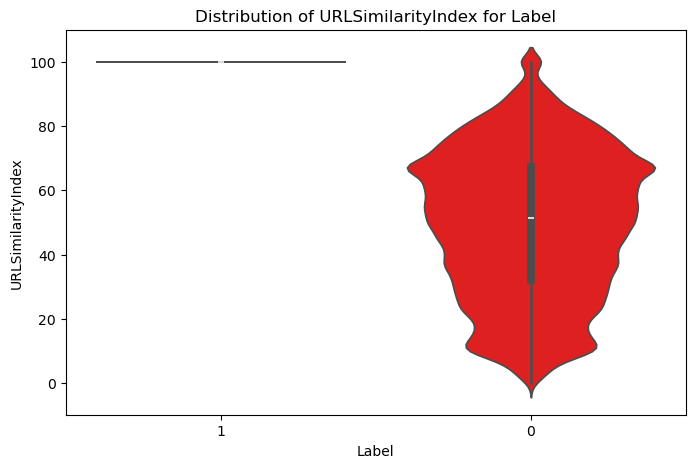

In [117]:
fig = next(cont_gen) 
fig.show()

El `URLSimilarityIndex` muestra un comportamiento claramente diferenciado entre los dos grupos. En el caso de las URLs legítimas, el índice se mantiene de forma consistente alrededor de $100$, sin variabilidad aparente. Esto indica que las URLs legítimas tienen una alta similitud con referencias conocidas como legitimas. Por otro lado, las URLs de phishing presentan una distribución mucho más dispersa, con valores que abarcan desde **$0$ hasta $100$**, lo que sugiere que pueden variar ampliamente en su grado de similitud con URLs legítimas.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/291225615.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



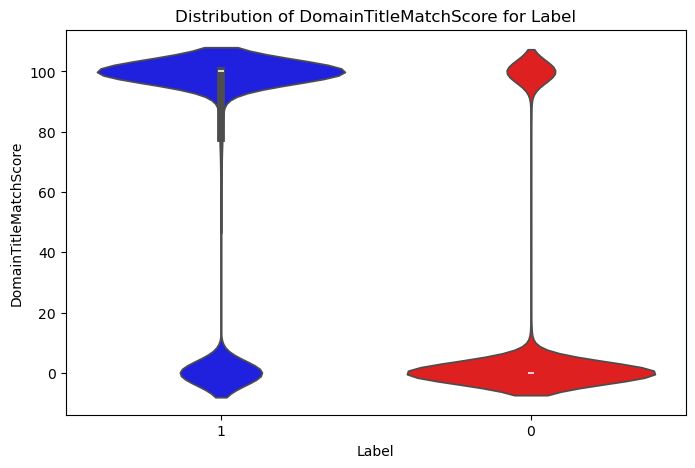

In [118]:
fig = next(cont_gen)  
fig.show()

el `DomainTitleMatchScore` tiende a ser significativamente mayor en URLs legítimas, con una distribución más concentrada y menos valores atípicos. En contraste, las URLs maliciosas presentan una mediana de **0**, con una gran cantidad de valores atípicos dispersos a lo largo de un rango amplio. Esto sugiere que, en general, los sitios legítimos tienden a tener un mayor grado de coincidencia entre el dominio y el título de la página, mientras que en los sitios maliciosos esta relación es mucho menos consistente, posiblemente porque suelen utilizar estrategias de engaño o generación automática de nombres.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/291225615.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



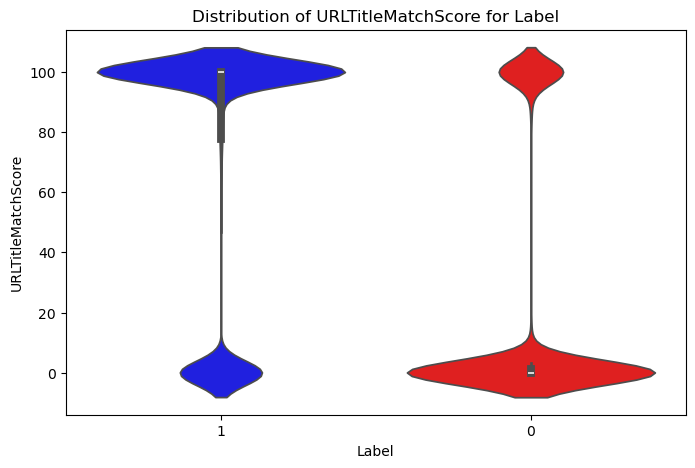

In [119]:
fig = next(cont_gen)  
fig.show()

Similar al `DomainTitleMatchScore`, el `URLTitleMatchScore` muestra una tendencia a valores altos en URLs legítimas, lo que indica una mayor coherencia entre la URL y el título de la página. En cambio, para las URLs maliciosas, esta medida tiende a **cero**, con una gran cantidad de valores atípicos dispersos. Esto refuerza la idea de que los sitios legítimos mantienen una mayor consistencia en sus elementos identificativos, mientras que los sitios de phishing suelen presentar discrepancias significativas entre la URL y el título, probablemente como parte de tácticas de engaño para atraer a los usuarios.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/291225615.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



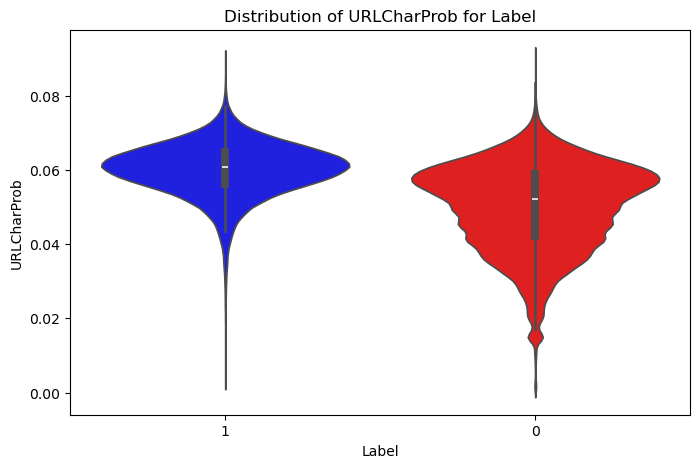

In [120]:
fig = next(cont_gen)  
fig.show()

El `URLCharProb` muestra una diferencia entre las URL legítimas y las maliciosas. Para las URL phishing, la distribución es más variable, con una mediana menor y mas dispersión, lo que indica que tienden a seguir patrones más predecibles en la composición de sus caracteres. En contraste, las URL legítimas presentan una menor variabilidad, con valores más compactos y una mediana más alta. Además, las URL legítimas muestran más valores atípicos en el extremo superior, lo que podría indicar la presencia de dominios con estructuras menos convencionales. A diferencia de las variables anteriores las diferencias entre ambas URL ya no son tan evidentes.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/291225615.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



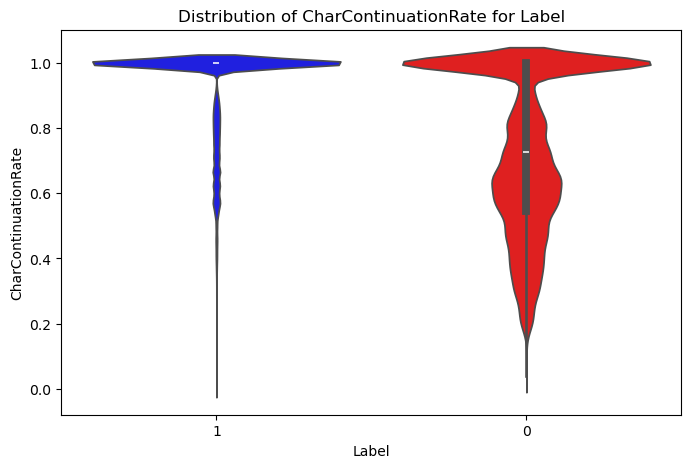

In [121]:
fig = next(cont_gen)  
fig.show()

El gráfico de la distribución de `CharContinuationRate` por `Label` muestra un contraste notable entre URLs legítimas y de phishing.  

Las URLs de phishing presentan una distribución amplia, con valores que oscilan principalmente entre 0.5 y 1.0, y una mediana cercana a 0.7. Esto indica una alta tasa de continuidad de caracteres, lo que sugiere patrones de escritura potencialmente sospechosos.  

En contraste, las URLs legítimas muestran un comportamiento mucho más uniforme, con la mayoría de los valores cercanos a 1.0 y con algunso valores atípicos.  

Esta diferencia marcada sugiere que la tasa de continuidad de caracteres podría ser un indicador útil para distinguir entre URLs maliciosas y legítimas. Las URLs de phishing tienden a presentar patrones de caracteres menos naturales, posiblemente debido a técnicas de ofuscación o intentos de imitar URLs legítimas mediante manipulaciones en la secuencia de caracteres.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/3018325744.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



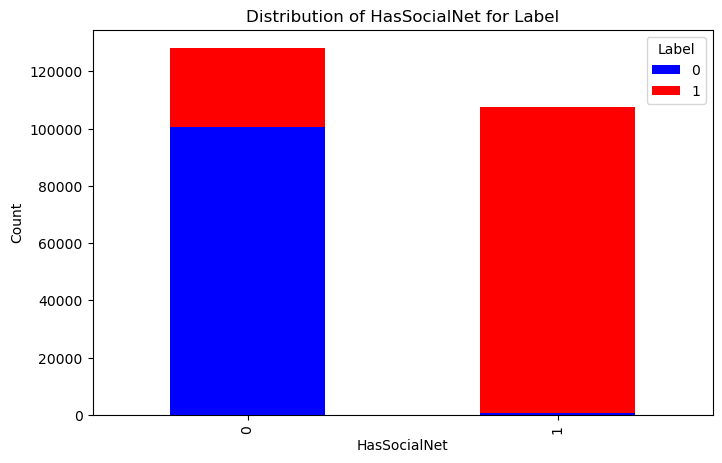

In [122]:
fig = next(bin_gen)
fig.show()

La distribución de `HasSocialNet` por `Label` evidencia una diferencia significativa en la presencia de enlaces a redes sociales entre URLs legítimas y de phishing.  

Las URLs legítimas tienden a incluir enlaces a redes sociales con mayor frecuencia, lo que refleja una estrategia común entre sitios auténticos para reforzar su presencia digital y credibilidad. En contraste, las URLs de phishing muestran una marcada ausencia de estos enlaces, con un volumen considerable de instancias sin presencia en redes sociales.  

Esta discrepancia puede atribuirse a que los atacantes evitan incluir enlaces a perfiles sociales para reducir la trazabilidad y minimizar posibles rutas de verificación para el usuario. La falta de estas referencias en sitios fraudulentos refuerza la utilidad de `HasSocialNet` como un factor relevante en la identificación de amenazas de phishing.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/3018325744.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



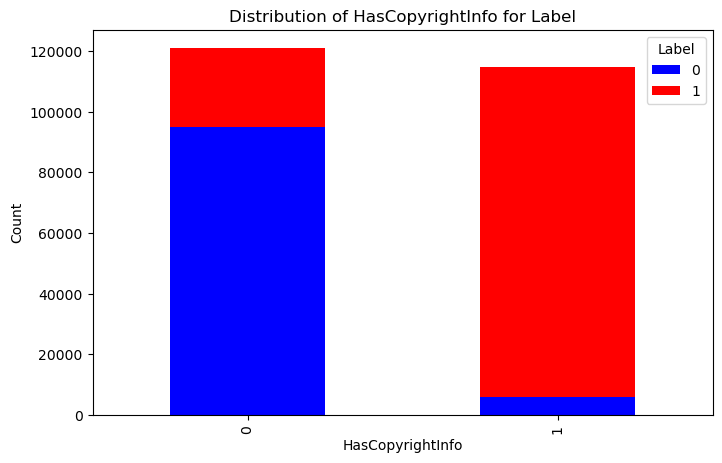

In [123]:
fig = next(bin_gen)
fig.show()

La distribución de `HasCopyrightInfo` por `Label` revela una diferencia marcada en la inclusión de información de derechos de autor entre sitios legítimos y de phishing.  

Las URLs legítimas muestran una fuerte tendencia a incluir información de copyright (`HasCopyrightInfo=1`), un elemento común en sitios oficiales que buscan proteger su contenido y reforzar su credibilidad. En contraste, la mayoría de las URLs de phishing carecen de esta información, lo que podría deberse a la rapidez con la que se crean estos sitios y la falta de interés en cumplir con estándares legales.  

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/3018325744.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



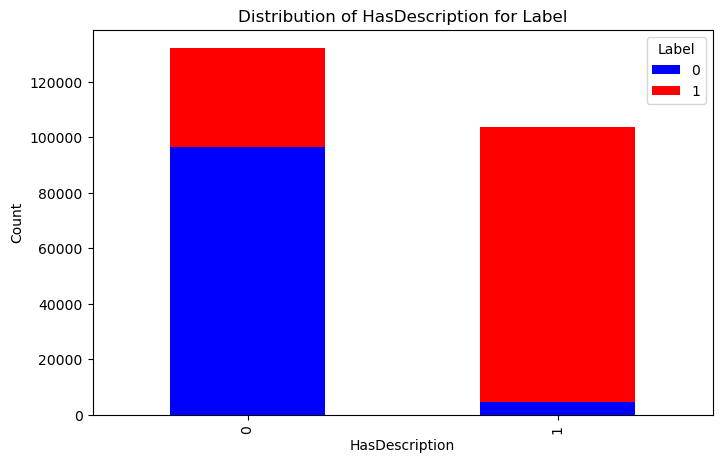

In [124]:
fig = next(bin_gen)
fig.show()

La distribución de `HasDescription` por `Label` evidencia diferencias significativas en el uso de etiquetas de descripción entre sitios legítimos y de phishing.  

Las URLs legítimas presentan una clara tendencia a incluir metadatos descriptivos (`HasDescription=1`), en línea con las buenas prácticas de SEO y diseño web profesional que refuerzan la visibilidad y credibilidad de un sitio. En contraste, las URLs de phishing exhiben un comportamiento heterogéneo: una proporción considerable omite las descripciones, posiblemente para agilizar la creación del sitio, mientras que otro grupo las incorpora, probablemente con la intención de imitar fielmente páginas legítimas.  

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/3018325744.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



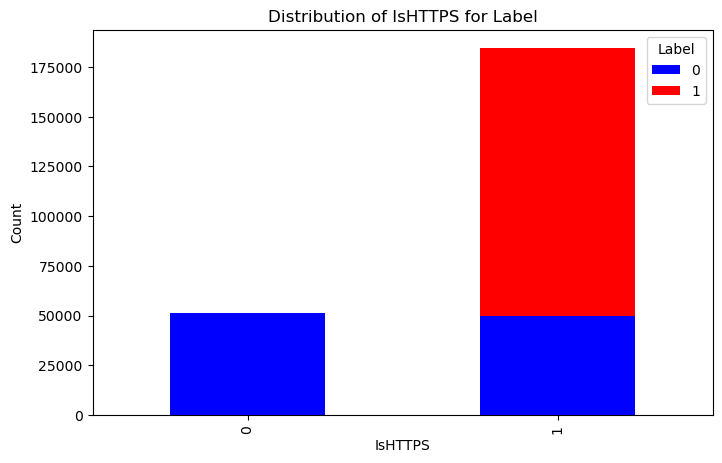

In [125]:
fig = next(bin_gen)
fig.show()

La variable `IsHTTPS` muestra un patrón distintivo en la adopción del protocolo HTTPS entre sitios legítimos y de phishing.  

Los sitios legítimos presentan una alta prevalencia en el uso de HTTPS, reflejando su compromiso con la seguridad y el cifrado de datos, una práctica estándar en plataformas confiables. En contraste, un porcentaje significativo de sitios de phishing no implementa este protocolo, lo que sugiere una menor inversión en medidas de seguridad. 

Si bien la ausencia de HTTPS es un indicio fuerte de posible fraude, su presencia no garantiza la legitimidad de un sitio, por lo que esta variable debe considerarse junto con otros factores en la detección de phishing.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/3018325744.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



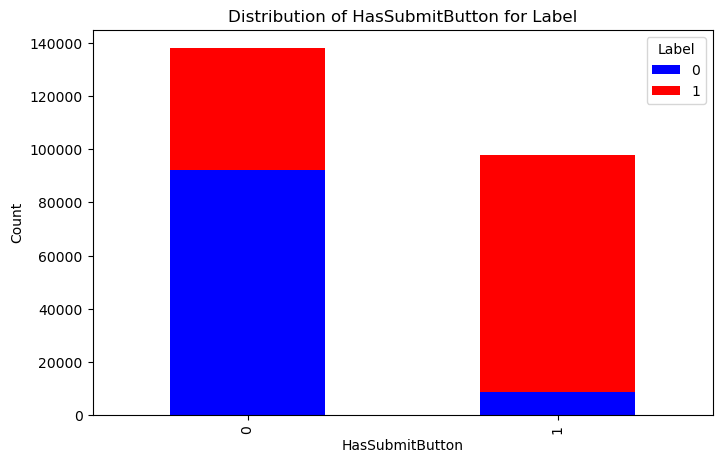

In [126]:
fig = next(bin_gen)
fig.show()

El atributo `HasSubmitButton` exhibe un patrón claro en la presencia de botones de envío entre sitios legítimos y de phishing.  

Los sitios legítimos muestran una fuerte tendencia a incluir botones de envío en sus formularios (`HasSubmitButton=1`), reflejando un diseño estructurado que facilita la interacción del usuario. En contraste, los sitios de phishing presentan un comportamiento mixto: mientras que una parte significativa carece de botones de envío, otra porción considerable sí los incorpora, lo que indica estrategias diversas entre los atacantes. Algunos sitios fraudulentos pueden omitir estos botones para implementar métodos alternativos de captura de datos, como envíos automáticos mediante scripts, mientras que otros replican fielmente la funcionalidad de los sitios originales para ganar credibilidad. 

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/3018325744.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



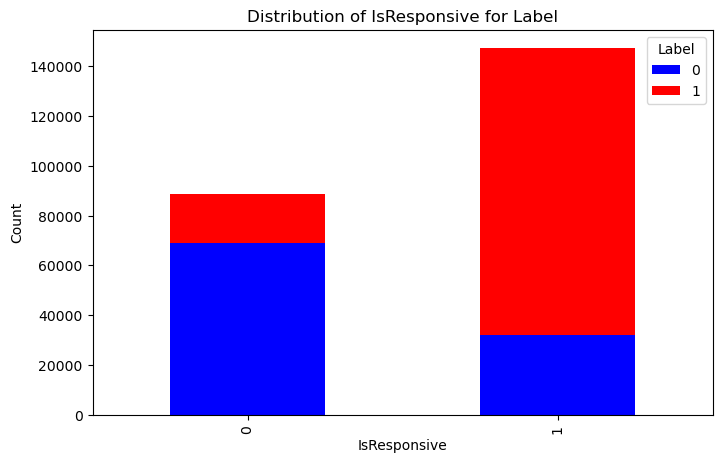

In [127]:
fig = next(bin_gen)
fig.show()

El atributo `IsResponsive` presenta una diferencia notable entre sitios legítimos y de phishing en cuanto a la adaptabilidad de la página web a distintos dispositivos.  

Los sitios legítimos muestran una clara preferencia por contar con diseño responsivo (`IsResponsive=1`). Esto es consistente con las mejores prácticas de desarrollo web, ya que los sitios legítimos suelen optimizarse para una correcta visualización en distintos dispositivos, mejorando la accesibilidad y la experiencia del usuario.  

En contraste, los sitios de phishing exhiben un comportamiento más disperso. Aunque una parte significativa de estos sitios no implementa diseño responsivo (`IsResponsive=0`), existe una pequeña cantidad que sí lo hace. Esto sugiere que algunos atacantes optan por construir sitios web más sofisticados que imitan a los originales, mientras que otros priorizan la rapidez y simplicidad en la creación de páginas fraudulentas, omitiendo características avanzadas de diseño.  

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/3018325744.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



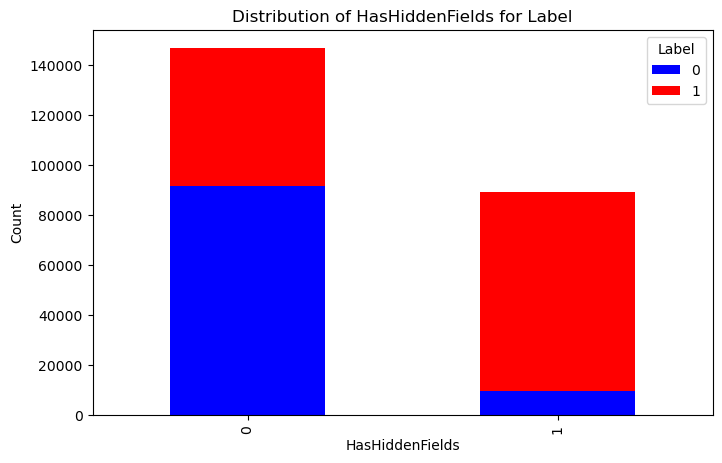

In [128]:
fig = next(bin_gen)
fig.show()

El atributo `HasHiddenFields` indica la presencia de campos ocultos en una página web, lo que puede ser relevante en la detección de sitios de phishing.  

Se observa que la mayoría de los sitios legítimos tienen una mayor proporción de `HasHiddenFields=1`, lo que indica que es común que los sitios auténticos incluyan campos ocultos, probablemente por razones de seguridad, almacenamiento de estado o seguimiento de sesión.  

Por otro lado, los sitios de phishing se encuentran predominantemente en `HasHiddenFields=0`, lo que sugiere que muchas páginas fraudulentas omiten este tipo de campos. Esto puede deberse a que los atacantes buscan simplicidad en sus formularios para recolectar credenciales sin mecanismos adicionales. Sin embargo, aún existe una fracción de sitios de phishing que sí incorporan campos ocultos, lo que implica que este atributo por sí solo no es suficiente para distinguirlos con certeza.  

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/3018325744.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



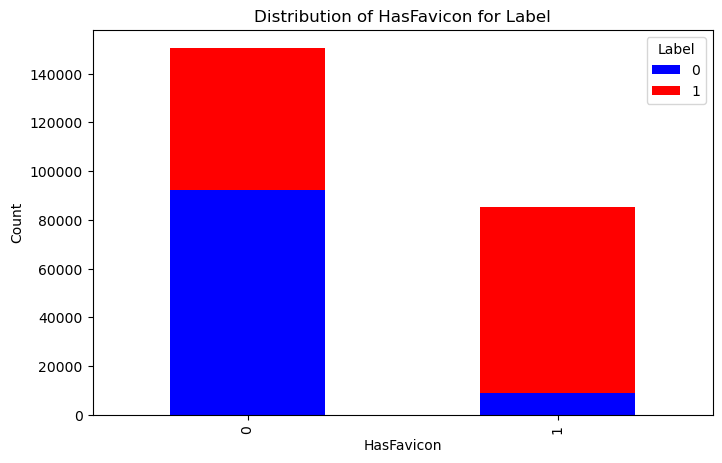

In [129]:
fig = next(bin_gen)
fig.show()

En cuanto ala variable `HasFavicon` su presencia (`HasFavicon=1`) suele indicar que el sitio está bien configurado, lo cual es común en sitios legítimos.  

La gráfica muestra que la mayoría de los sitios sin favicon (`HasFavicon=0`) están asociados con la clase de phishing (etiqueta=1), mientras que los sitios con favicon presentan una mayor proporción de sitios legítimos. Sin embargo, también hay sitios legítimos sin favicon, por lo que esta variable no es determinante por sí sola, pero sí aporta información útil dentro de un modelo de detección de phishing.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/3018325744.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



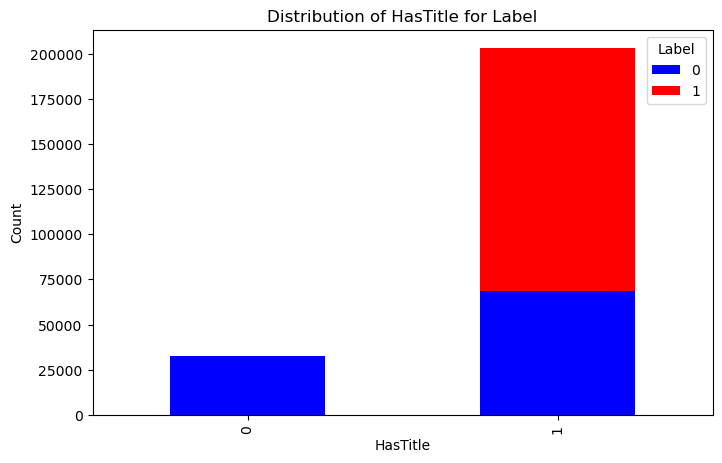

In [130]:
fig = next(bin_gen)
fig.show()

En cuanto a la variable `HasTitle` que indica la presencia de un titulo en el código `HTML` en su mayoría están principalmente asociadas con sitios legítimos (`label=1`). En cambio, las páginas sin título (`HasTitle=0`) estan asociadas principalmente con URL phishing.

### ***Análisis Univariado***

In [ ]:
top_corr = correlation_matrix["label"].sort_values(ascending=False)[1:16]
top_vars = list(top_corr.index)

num_vars = [var for var in top_vars if df[var].nunique() > 10]
cat_vars = [var for var in top_vars if df[var].nunique() <= 10]

def plot_numeric_vars_gen(df, var_gen):
    for var in var_gen:
        fig, ax = plt.subplots(figsize=(6,4))
        sns.histplot(df[var], kde=True, bins=30, color='dodgerblue', ax=ax)
        ax.set_title(f'Distribution of {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')
        yield fig, var  

def plot_categorical_vars_gen(df, var_gen):
    for var in var_gen:
        fig, ax = plt.subplots(figsize=(5,3))
        # Generamos un color único para cada barra
        categories = df[var].value_counts().index
        # Corregir según el warning: asignar x a hue y legend=False
        colors = list(matplotlib.colormaps['tab20'].colors[:len(categories)])
        sns.countplot(x=var, hue=var, data=df, ax=ax, palette=colors, legend=False)
        ax.set_title(f'Counts for {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')
        yield fig, var

num_vars_iterator = plot_numeric_vars_gen(df, num_vars)
cat_vars_iterator = plot_categorical_vars_gen(df, cat_vars)

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/168349927.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



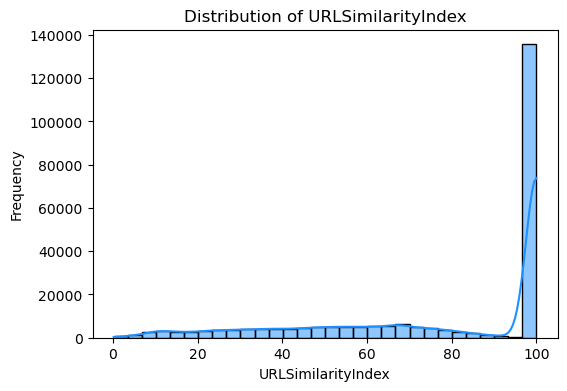

In [133]:
fig, var_name = next(num_vars_iterator)
fig.show()

`URLSimilarityIndex`: presenta una distribución altamente sesgada hacia valores cercanos a 100. La gran mayoría de las observaciones se concentran en el rango superior, indicando que es muy común que las URLs analizadas tengan un alto grado de similitud con alguna referencia conocida (sitios legítimos). La presencia de un pico extremo en la parte alta sugiere que este indicador es una señal fuerte para la clasificación y podría ser una de las variables más predictivas para detectar URLs legítimas.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/168349927.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



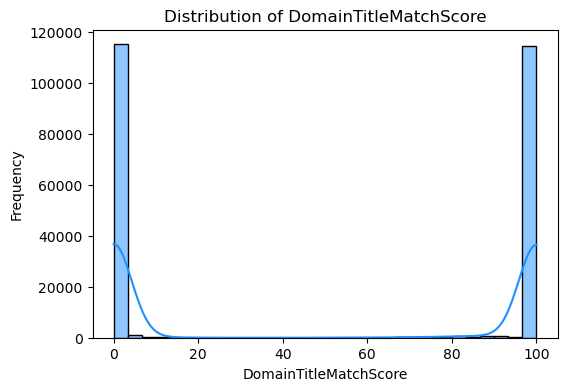

In [134]:
fig, var_name = next(num_vars_iterator)
fig.show()

`DomainTitleMatchScore`: muestra una distribución bimodal muy marcada, con concentraciones extremas en los valores 0 y 100. Esto indica que la mayoría de los registros corresponden a casos donde el dominio y el título del sitio web o bien no coinciden en absoluto, o coinciden completamente. La presencia de estos dos picos extremos sugiere que esta variable funciona como un discriminante fuerte entre URLs legítimas y potenciales intentos de phishing.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/168349927.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



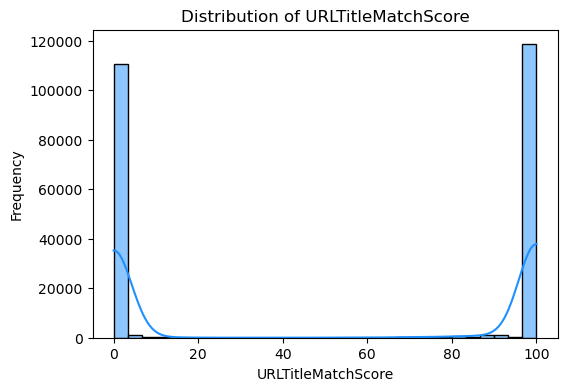

In [135]:
fig, var_name = next(num_vars_iterator)
fig.show()

La variable `URLTitleMatchScore` también presenta una distribución bimodal, con acumulaciones extremas en los valores cercanos a 0 y 100. Esto refleja que la mayoría de las URLs o bien no coinciden en absoluto con el título de la página o coinciden completamente. Esta estructura indica que la variable es altamente dicotómica y muy posiblemente tenga un fuerte potencial para diferenciar entre URLs legítimas y maliciosas dentro del proceso de clasificación.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/168349927.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



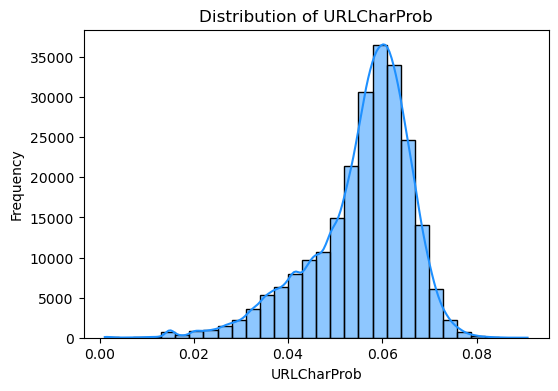

In [136]:
fig, var_name = next(num_vars_iterator)
fig.show()

La variable `URLCharProb` exhibe una distribución aproximadamente normal, con una ligera asimetría negativa. El pico pronunciado en torno a 0.06 indica alta concentración de observaciones alrededor de la media, sugiriendo una curtosis leptocúrtica, es decir, una distribución con colas más pesadas y un pico más agudo en comparación con la normal. Las colas, aunque presentes, son poco pronunciadas, lo que evidencia que los valores extremos no son tan frecuente. En conjunto, la forma de esta distribución sugiere estabilidad en este indicador, pero la presencia de algunos valores alejados del centro podría estar asociada a URLs con estructuras atípicas o sospechosas.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/168349927.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



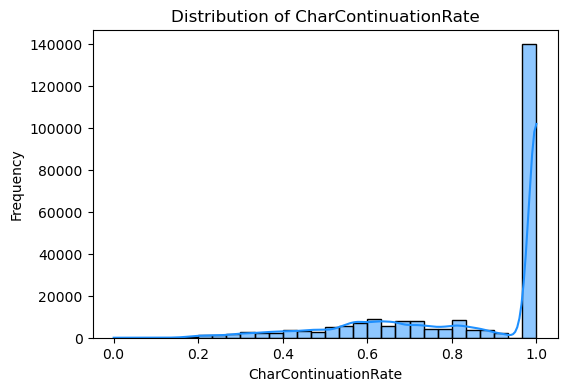

In [137]:
fig, var_name = next(num_vars_iterator)
fig.show()

`CharContinuationRate`: presenta una distribución con asimetría negativa, ya que la mayoría de las observaciones se encuentran concentradas cerca de 1 y la cola se extiende hacia valores bajos. Esto refleja que las URLs suelen mostrar altos niveles de continuidad en su estructura de caracteres, mientras que los casos con valores bajos son poco frecuentes y podrían representar patrones menos estructurados o más aleatorios.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2758715180.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



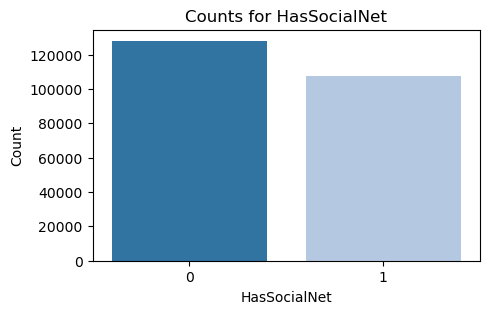

In [138]:
fig, var_name = next(cat_vars_iterator)
fig.show()

`HasSocialNet`: presenta una distribución bastante equilibrada entre las categorías 0 y 1, con una ligera frecuencia mas alta para la ausencia de elementos de redes sociales. Esta cercanía en las proporciones indica que no hay un dominio claro de una categoría sobre la otra, por lo que, por sí sola, esta variable podría no ser un fuerte discriminante. Sin embargo, su relevancia podría emerger en interacción con otras variables o en análisis multivariados, donde la presencia de elementos sociales combinada con otros factores podría aportar información valiosa para la detección de URLs maliciosas.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2758715180.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



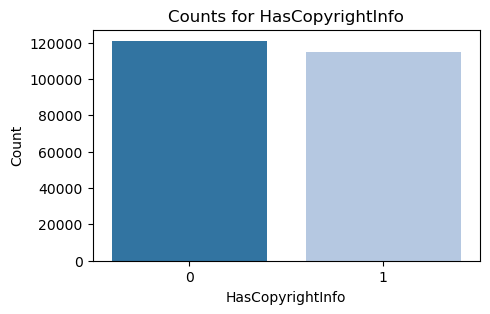

In [139]:
fig, var_name = next(cat_vars_iterator)
fig.show()

La variable `HasCopyrightInfo` muestra una distribucción bastante similar a la `HasSocialNet` con una frecuencia casi igualada entre las categorias. Esta cercanía en los conteos sugiere que, de manera aislada, la presencia o ausencia de información de derechos de autor no es un factor claramente diferenciador entre sitios legítimos y sospechosos.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2758715180.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



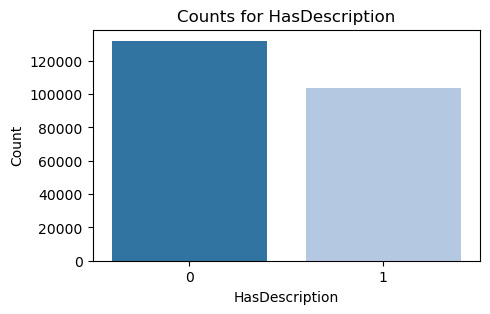

In [140]:
fig, var_name = next(cat_vars_iterator)
fig.show()

`HasDescription`: presenta una mayor frecuencia en la categoría 0, indicando que es más común encontrar páginas sin una meta descripción definida. Aunque existe una diferencia apreciable entre ambas categorías, no es extremadamente marcada. Esto sugiere que, si bien la ausencia de descripción podría estar asociada a sitios menos confiables o de menor calidad, la variable por sí sola no parece ser un fuerte discriminante.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2758715180.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



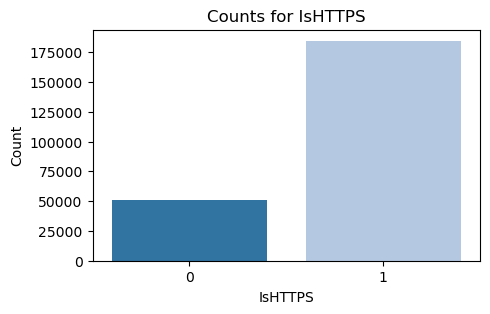

In [141]:
fig, var_name = next(cat_vars_iterator)
fig.show()

En cuanto a la variable `IsHTTPS` es la que muestra la mayor diferencia entre categorías, donde la mayoría de las URLs utilizan HTTPS. Esta fuerte presencia sugiere que el uso de HTTPS es un comportamiento estándar en sitios legítimos, aunque su ausencia no necesariamente implica phishing. Es un indicador relevante pero no definitivo por sí solo.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2758715180.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



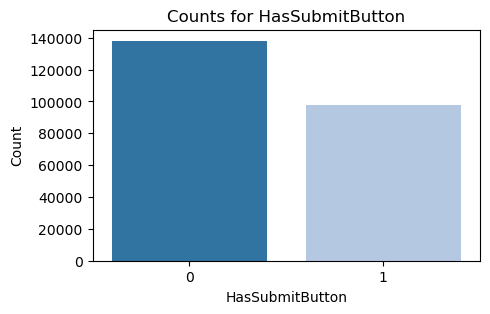

In [142]:
fig, var_name = next(cat_vars_iterator)
fig.show()

`HasSubmitButton`: La distribución presenta más casos sin botón de envío, aunque la diferencia con respecto a la presencia no es extrema. Esto indica que, si bien la ausencia de formularios puede ser un patrón en ciertos sitios (como páginas informativas o estáticas), esta variable podría ser más relevante combinada con otras características.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2758715180.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



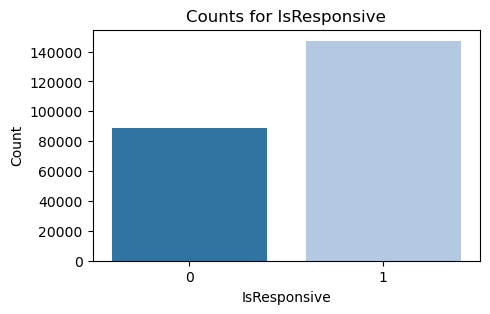

In [143]:
fig, var_name = next(cat_vars_iterator)
fig.show()

`IsResponsive`: La mayoría de las URLs corresponden a sitios web responsivos. Esta diferencia es considerable y puede tener importancia, dado que sitios legítimos suelen estar optimizados para distintos dispositivos, mientras que sitios fraudulentos pueden carecer de esa característica. Por tanto, esta variable podría aportar valor discriminante en el modelo.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2758715180.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



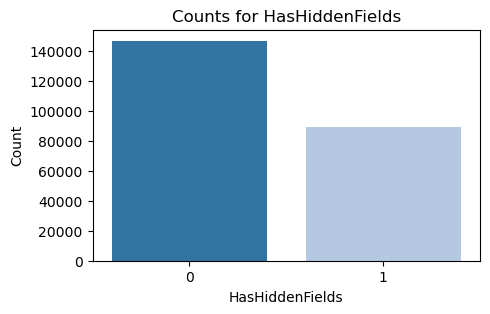

In [144]:
fig, var_name = next(cat_vars_iterator)
fig.show()

`HasHiddenFields`: La distribución evidencia una mayor frecuencia de casos sin campos ocultos. Aunque existe diferencia, no es extrema. La presencia de campos ocultos podría ser un comportamiento sospechoso, pero su capacidad de discriminación dependerá posiblemente de su combinación con otras variables.  

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2758715180.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



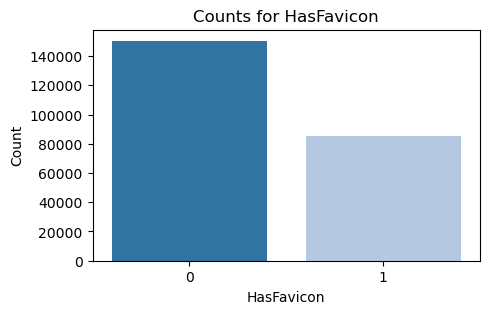

In [145]:
fig, var_name = next(cat_vars_iterator)
fig.show()

`HasFavicon`: La mayoría de los registros no presentan favicon, lo que puede ser indicativo de sitios poco profesionales o falsificados. Esta variable podría ser relevante, pero no es concluyente de manera aislada.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2758715180.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



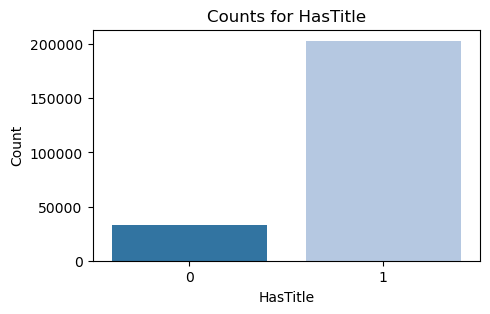

In [146]:
fig, var_name = next(cat_vars_iterator)
fig.show()

`HasTitle`: Hay una diferencia marcada a favor de la presencia de título, lo cual es lógico dado que la mayoría de las páginas legítimas incluyen título. La ausencia de título puede ser un fuerte indicador de sitios fraudulentos o mal diseñados, por lo que esta variable tiene potencial discriminante.  

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_9331/2758715180.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



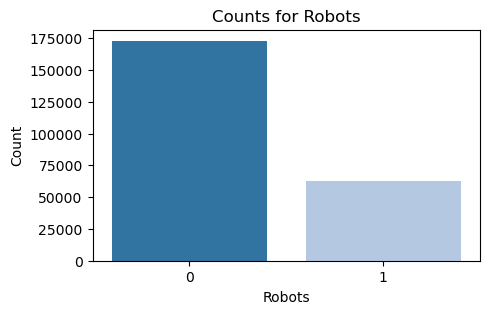

In [147]:
fig, var_name = next(cat_vars_iterator)
fig.show()

`Robots`: La variable muestra una alta frecuencia de ausencia del archivo robots.txt. La presencia de este archivo suele asociarse a buenas prácticas en sitios legítimos; su ausencia no necesariamente implica phishing, pero en conjunto con otros factores puede sumar valor predictivo.